Geolocation Integration
IP to Country Mapping & Geographic Risk Analysis

Objective: Map IP addresses to countries and analyze geographic fraud patterns.

Key Questions:
1. Which countries have highest fraud rates?
2. Are there geographic fraud patterns?
3. How to detect VPN/Proxy usage?
4. What are the high-risk regions?

Data Sources:
- Processed fraud data from `data/processed/`
- IP country mapping data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import json
import os
from pathlib import Path
from datetime import datetime

warnings.filterwarnings('ignore')

# Custom styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (16, 10)

# Define directories
BASE_DIR = Path("D:/10 acadamy/fraud-detection-ml-system")
DATA_PROCESSED_DIR = BASE_DIR / "data" / "processed"
OUTPUT_DIR = BASE_DIR / "outputs" / "Data_Analysis_processing"
REPORTS_DIR = OUTPUT_DIR / "reports"
STATISTICS_DIR = OUTPUT_DIR / "statistics"
VISUALIZATIONS_DIR = OUTPUT_DIR / "visualizations"

# Create directories if they don't exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
REPORTS_DIR.mkdir(parents=True, exist_ok=True)
STATISTICS_DIR.mkdir(parents=True, exist_ok=True)
VISUALIZATIONS_DIR.mkdir(parents=True, exist_ok=True)

print("📁 Directory setup complete:")
print(f"  • Data processed: {DATA_PROCESSED_DIR}")
print(f"  • Outputs: {OUTPUT_DIR}")
print(f"  • Reports: {REPORTS_DIR}")
print(f"  • Visualizations: {VISUALIZATIONS_DIR}")

📁 Directory setup complete:
  • Data processed: D:\10 acadamy\fraud-detection-ml-system\data\processed
  • Outputs: D:\10 acadamy\fraud-detection-ml-system\outputs\Data_Analysis_processing
  • Reports: D:\10 acadamy\fraud-detection-ml-system\outputs\Data_Analysis_processing\reports
  • Visualizations: D:\10 acadamy\fraud-detection-ml-system\outputs\Data_Analysis_processing\visualizations


In [2]:
# Load data
print("📥 Loading data...")

# Check available files
available_files = os.listdir(DATA_PROCESSED_DIR)
print(f"Available files in {DATA_PROCESSED_DIR}:")
csv_files = [f for f in available_files if f.endswith('.csv')]
for file in csv_files:
    file_size = os.path.getsize(DATA_PROCESSED_DIR / file) / (1024*1024)
    print(f"  • {file} ({file_size:.2f} MB)")

# Load fraud data
fraud_files = [f for f in csv_files if 'fraud' in f.lower() and 'cleaned' in f.lower()]
if fraud_files:
    fraud_file = DATA_PROCESSED_DIR / max(fraud_files)  # Get latest
    try:
        fraud_df = pd.read_csv(fraud_file, parse_dates=['signup_time', 'purchase_time'])
        print(f"✅ Fraud data loaded: {fraud_df.shape[0]:,} transactions")
    except Exception as e:
        print(f"❌ Error loading fraud data: {e}")
        print("Trying without date parsing...")
        fraud_df = pd.read_csv(fraud_file)
        # Try to convert dates manually if columns exist
        for col in ['signup_time', 'purchase_time']:
            if col in fraud_df.columns:
                try:
                    fraud_df[col] = pd.to_datetime(fraud_df[col])
                except:
                    print(f"⚠️ Could not parse {col} as datetime")
        print(f"✅ Fraud data loaded (dates may not be parsed): {fraud_df.shape[0]:,} transactions")
else:
    print("❌ No cleaned fraud data found!")
    fraud_df = pd.DataFrame()

# Load credit card data (optional for comparison)
credit_files = [f for f in csv_files if ('credit' in f.lower() or 'card' in f.lower()) and 'cleaned' in f.lower()]
if credit_files:
    credit_file = DATA_PROCESSED_DIR / max(credit_files)
    try:
        credit_df = pd.read_csv(credit_file)
        print(f"✅ Credit card data loaded: {credit_df.shape[0]:,} transactions")
    except Exception as e:
        print(f"❌ Error loading credit card data: {e}")
        credit_df = pd.DataFrame()
else:
    credit_df = pd.DataFrame()
    print("ℹ️ No credit card data loaded")

# Load IP mapping data
ip_files = [f for f in csv_files if 'ip' in f.lower() and 'mapping' in f.lower()]
if ip_files:
    ip_file = DATA_PROCESSED_DIR / max(ip_files)
    try:
        ip_df = pd.read_csv(ip_file)
        print(f"✅ IP mapping data: {ip_df.shape[0]:,} IP ranges, {ip_df['country'].nunique()} countries")
    except Exception as e:
        print(f"❌ Error loading IP mapping data: {e}")
        ip_df = pd.DataFrame()
else:
    print("❌ No IP mapping data found!")
    ip_df = pd.DataFrame()

print(f"\n📊 Data loaded successfully!")

# Display data info
print("\n📋 DATA SUMMARY:")
print(f"  • Fraud data shape: {fraud_df.shape if not fraud_df.empty else 'No data'}")
print(f"  • Credit data shape: {credit_df.shape if not credit_df.empty else 'No data'}")
print(f"  • IP mapping shape: {ip_df.shape if not ip_df.empty else 'No data'}")

if not fraud_df.empty:
    print(f"\n🔍 Fraud data columns: {list(fraud_df.columns)}")
    print(f"   - Date columns: {[col for col in fraud_df.columns if 'time' in col.lower() or 'date' in col.lower()]}")
    print(f"   - Numeric columns: {list(fraud_df.select_dtypes(include=[np.number]).columns)}")
    print(f"   - Categorical columns: {list(fraud_df.select_dtypes(include=['object']).columns)}")

📥 Loading data...
Available files in D:\10 acadamy\fraud-detection-ml-system\data\processed:
  • creditcard_cleaned.csv (143.56 MB)
  • creditcard_cleaned_20251219_103703.csv (143.56 MB)
  • creditcard_data_processed_20251218_173255.csv (144.10 MB)
  • creditcard_data_processed_latest.csv (144.10 MB)
  • fraud_data_cleaned.csv (14.32 MB)
  • fraud_data_cleaned_20251219_103703.csv (14.32 MB)
  • fraud_data_processed_20251218_173255.csv (14.32 MB)
  • fraud_data_processed_latest.csv (14.32 MB)
  • fraud_with_country_20251219_123003.csv (15.19 MB)
  • ip_country_data_processed_20251218_173255.csv (4.80 MB)
  • ip_country_data_processed_latest.csv (4.80 MB)
  • ip_country_mapping.csv (4.80 MB)
  • ip_country_mapping_20251219_103703.csv (4.80 MB)
✅ Fraud data loaded: 151,112 transactions
✅ Credit card data loaded: 283,726 transactions
✅ IP mapping data: 138,846 IP ranges, 235 countries

📊 Data loaded successfully!

📋 DATA SUMMARY:
  • Fraud data shape: (151112, 11)
  • Credit data shape: (2

IP to Country Mapping

Objective: Map IP addresses from fraud transactions to their respective countries.

Approach:
- Use IP range data to map numeric IPs to countries
- Handle edge cases and unmapped IPs
- Calculate mapping success rate

Expected Output:
- Fraud dataset with country column
- Mapping statistics report
- Sample mappings for verification

In [15]:
# ============================================================================
# IP TO COUNTRY MAPPING ENGINE
# Using your ip_country_mapping.csv format
# ============================================================================

# ADD THIS IMPORT IF NOT ALREADY IN CELL 1
import time
from datetime import datetime

print("="*90)
print("🌍 IP-TO-COUNTRY MAPPING ENGINE")
print("="*90)

def map_ip_to_country_optimized(ip_value, ip_ranges_df):
    """
    Optimized IP mapping using your CSV format:
    lower_bound_ip_address, upper_bound_ip_address, country
    """
    try:
        # Convert IP to float
        ip_float = float(ip_value)
        
        # Vectorized search (much faster for large datasets)
        mask = (ip_float >= ip_ranges_df['lower_bound_ip_address']) & (ip_float <= ip_ranges_df['upper_bound_ip_address'])
        matches = ip_ranges_df[mask]
        
        if not matches.empty:
            return matches.iloc[0]['country']
        else:
            return 'Unknown'
    except Exception as e:
        return 'Error'

# Check if we can proceed
if fraud_df.empty or ip_df.empty:
    print("❌ CANNOT PROCEED: Missing required data!")
    print(f"   Fraud data available: {not fraud_df.empty}")
    print(f"   IP mapping available: {not ip_df.empty}")
else:
    # Check for IP column
    if 'ip_address' not in fraud_df.columns:
        print("❌ 'ip_address' column not found in fraud data!")
        print(f"   Available columns: {list(fraud_df.columns)}")
        
        # Try to find IP column with different names
        ip_aliases = ['ip', 'ip_addr', 'ipaddress', 'user_ip', 'client_ip', 'source_ip']
        ip_col_found = None
        
        for alias in ip_aliases:
            if alias in fraud_df.columns:
                ip_col_found = alias
                fraud_df = fraud_df.rename(columns={alias: 'ip_address'})
                print(f"   ✅ Found and renamed '{alias}' to 'ip_address'")
                break
        
        if ip_col_found is None:
            print("   ❌ No IP column found. Please check your data.")
    else:
        print("✅ IP address column found in fraud data")
    
    if 'ip_address' in fraud_df.columns:
        print(f"\n🔍 SAMPLE IP ADDRESSES:")
        print(f"   {fraud_df['ip_address'].head(5).tolist()}")
        
        # Test mapping with first 1000 records
        print("\n🧪 TESTING MAPPING (first 1000 records)...")
        test_df = fraud_df.head(1000).copy()
        test_df['country'] = test_df['ip_address'].apply(lambda x: map_ip_to_country_optimized(x, ip_df))
        
        # Calculate test statistics
        mapped_test = (test_df['country'] != 'Unknown').sum() - (test_df['country'] == 'Error').sum()
        success_rate = (mapped_test / 1000) * 100
        
        print(f"   ✅ Test Success Rate: {success_rate:.1f}%")
        print(f"   ✅ Sample Mappings:")
        
        for idx, row in test_df.head(5).iterrows():
            fraud_flag = "🚩 FRAUD" if row.get('class', 0) == 1 else "✅ LEGIT"
            print(f"      IP {row['ip_address']} → {row['country']} | {fraud_flag}")
        
        # Ask for full mapping
        print(f"\n📊 READY FOR FULL MAPPING")
        print(f"   • Total records: {len(fraud_df):,}")
        print(f"   • Expected success rate: {success_rate:.1f}%")
        
        proceed = input("\nProceed with full IP-to-country mapping? (yes/no): ")
        
        if proceed.lower() == 'yes':
            print("\n🔄 MAPPING ALL IP ADDRESSES...")
            start_time = time.time()
            
            # Apply mapping to entire dataset
            fraud_df['country'] = fraud_df['ip_address'].apply(lambda x: map_ip_to_country_optimized(x, ip_df))
            
            # Create the required variable
            fraud_with_country = fraud_df.copy()
            
            mapping_time = time.time() - start_time
            
            # Calculate statistics
            total_records = len(fraud_with_country)
            mapped_count = (fraud_with_country['country'] != 'Unknown').sum() - (fraud_with_country['country'] == 'Error').sum()
            mapping_rate = (mapped_count / total_records) * 100
            unique_countries = fraud_with_country['country'].nunique() - 2  # Exclude Unknown/Error
            
            print(f"\n✅ IP MAPPING COMPLETED!")
            print(f"   • Time taken: {mapping_time:.2f} seconds")
            print(f"   • Total mapped: {mapped_count:,} ({mapping_rate:.1f}%)")
            print(f"   • Unique countries: {unique_countries}")
            print(f"   • Variable created: 'fraud_with_country'")
            
            # Save mapped data
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            mapped_filename = DATA_PROCESSED_DIR / f"fraud_with_country_{timestamp}.csv"
            fraud_with_country.to_csv(mapped_filename, index=False)
            print(f"   💾 Saved to: {mapped_filename}")
            
        else:
            print("⚠️ Mapping cancelled. Using test data for demonstration.")
            fraud_with_country = test_df.copy()
            print("⚠️ NOTE: Using TEST DATA (first 1000 records) only.")

🌍 IP-TO-COUNTRY MAPPING ENGINE
✅ IP address column found in fraud data

🔍 SAMPLE IP ADDRESSES:
   [732758368.79972, 350311387.865908, 2621473820.11095, 3840542443.91396, 415583117.452712]

🧪 TESTING MAPPING (first 1000 records)...
   ✅ Test Success Rate: 86.0%
   ✅ Sample Mappings:
      IP 732758368.79972 → Japan | ✅ LEGIT
      IP 350311387.865908 → United States | ✅ LEGIT
      IP 2621473820.11095 → United States | 🚩 FRAUD
      IP 3840542443.91396 → Unknown | ✅ LEGIT
      IP 415583117.452712 → United States | ✅ LEGIT

📊 READY FOR FULL MAPPING
   • Total records: 151,112
   • Expected success rate: 86.0%

🔄 MAPPING ALL IP ADDRESSES...

✅ IP MAPPING COMPLETED!
   • Time taken: 697.24 seconds
   • Total mapped: 129,146 (85.5%)
   • Unique countries: 180
   • Variable created: 'fraud_with_country'
   💾 Saved to: D:\10 acadamy\fraud-detection-ml-system\data\processed\fraud_with_country_20251219_152202.csv


Global Fraud Heatmap

Objective: Visualize fraud rates by country on a world map.

Key Metrics:
- Fraud rate per country (% of fraudulent transactions)
- Total transactions per country
- Average purchase value by country
- Time patterns by geography

Visualization: Interactive choropleth map showing fraud rates

In [28]:
# ============================================================================
# COMPREHENSIVE RISK SCORING - PRODUCTION VERSION
# ============================================================================

print("\n" + "="*90)
print("📊 COMPREHENSIVE RISK SCORING")
print("="*90)

# First, check if we have the required data
if 'fraud_with_country' not in locals() or fraud_with_country.empty:
    print("❌ ERROR: No mapped data available.")
    print("   Please run Cell 3 (IP Mapping) first!")
else:
    print(f"✅ Data available: {len(fraud_with_country):,} mapped transactions")
    
    # ===== DEBUG: CHECK IP MAPPING ISSUES =====
    print(f"\n🔍 DEBUGGING IP MAPPING ISSUES")
    print("-" * 90)
    
    # Check country column values
    if 'country' in fraud_with_country.columns:
        country_counts = fraud_with_country['country'].value_counts()
        print(f"Country distribution:")
        for country, count in country_counts.head(20).items():
            print(f"  • {country}: {count:,} transactions ({count/len(fraud_with_country)*100:.1f}%)")
        
        if len(country_counts) > 20:
            print(f"  • ... and {len(country_counts) - 20} more unique values")
        
        # Check for "Error" or "Unknown" specifically
        error_count = country_counts.get('Error', 0) + country_counts.get('Unknown', 0) + country_counts.get('unknown', 0)
        print(f"\n⚠️  WARNING: {error_count:,} transactions ({error_count/len(fraud_with_country)*100:.1f}%) have 'Error' or 'Unknown' country")
        
        # Check if we have any real country names
        real_countries = [c for c in country_counts.index if c not in ['Error', 'Unknown', 'unknown', '']]
        if real_countries:
            print(f"✅ Found {len(real_countries)} real countries")
            print(f"   Examples: {', '.join(real_countries[:10])}")
        else:
            print(f"❌ NO REAL COUNTRIES FOUND - IP MAPPING HAS FAILED!")
            print(f"   All transactions mapped to: {list(country_counts.index)}")
    
    # Check IP column
    if 'ip_address' in fraud_with_country.columns:
        print(f"\n🔍 IP Address sample (first 5):")
        for ip in fraud_with_country['ip_address'].head(5):
            print(f"  • {ip}")
    
    # Check for NaN values
    if 'country' in fraud_with_country.columns:
        nan_count = fraud_with_country['country'].isna().sum()
        if nan_count > 0:
            print(f"\n⚠️  {nan_count:,} transactions have NaN country values")
    
    # ===== ONLY PROCEED IF WE HAVE REAL COUNTRIES =====
    if len(real_countries) > 0:
        print(f"\n✅ Proceeding with risk scoring for {len(real_countries)} countries...")
        
        # ===== CREATE FILTERED DATA =====
        # This must be defined here, before conditional blocks
        valid_data = fraud_with_country[fraud_with_country['country'].isin(real_countries)]
        print(f"   Using {len(valid_data):,} valid transactions (filtered out 'Error'/'Unknown')")
        
        # Create country_stats (always recalculate from filtered data)
        print("🔍 Calculating country statistics from filtered data...")
        country_stats = valid_data.groupby('country').agg(
            total_transactions=('class', 'count'),
            fraud_transactions=('class', 'sum'),
            avg_purchase=('purchase_value', 'mean'),
            total_purchase=('purchase_value', 'sum')
        ).reset_index()
        
        country_stats['fraud_rate'] = (country_stats['fraud_transactions'] / 
                                      country_stats['total_transactions']) * 100
        
        print(f"✅ Country stats calculated for {len(country_stats)} valid countries")
        print(f"   Removed {len(fraud_with_country) - len(valid_data):,} Error/Unknown transactions")
        
        # ===== PROCEED WITH RISK SCORING =====
        country_risk = country_stats.copy()
        
        print(f"\n🔍 Calculating risk metrics...")
        
        # 1. Transaction velocity (transactions per hour, if time data available)
        if 'purchase_time' in valid_data.columns:
            print("  • Calculating transaction velocity...")
            try:
                # Convert to datetime if not already
                if valid_data['purchase_time'].dtype != 'datetime64[ns]':
                    valid_data['purchase_time'] = pd.to_datetime(valid_data['purchase_time'], errors='coerce')
                
                valid_data['purchase_hour'] = valid_data['purchase_time'].dt.floor('H')
                country_hourly = valid_data.groupby(['country', 'purchase_hour']).size().reset_index(name='hourly_count')
                country_velocity = country_hourly.groupby('country')['hourly_count'].std().reset_index(name='transaction_velocity')
                country_risk = country_risk.merge(country_velocity, on='country', how='left')
                print(f"    ✅ Transaction velocity calculated")
            except Exception as e:
                print(f"    ⚠️ Could not calculate transaction velocity: {e}")
                country_risk['transaction_velocity'] = 0
        
        # 2. Purchase value volatility
        if 'purchase_value' in valid_data.columns:
            print("  • Calculating purchase volatility...")
            purchase_volatility = valid_data.groupby('country')['purchase_value'].std().reset_index(name='purchase_volatility')
            country_risk = country_risk.merge(purchase_volatility, on='country', how='left')
            print(f"    ✅ Purchase volatility calculated")
        
        # 3. Fill missing values
        print("  • Filling missing values...")
        numeric_cols = country_risk.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if col in ['total_transactions', 'fraud_transactions']:
                country_risk[col] = country_risk[col].fillna(0)
            else:
                country_risk[col] = country_risk[col].fillna(country_risk[col].median() if not country_risk[col].empty else 0)
        
        # Define risk factors and weights
        risk_factors = {
            'fraud_rate': 0.4,
            'transaction_velocity': 0.2,
            'purchase_volatility': 0.2,
            'avg_purchase': 0.2
        }
        
        # Check which factors we have
        available_factors = [f for f in risk_factors.keys() if f in country_risk.columns]
        print(f"  • Available risk factors: {available_factors}")
        
        if not available_factors:
            print("❌ No risk factors available for scoring!")
        else:
            # Adjust weights if some factors are missing
            total_weight = sum(risk_factors[f] for f in available_factors)
            if total_weight > 0:
                for f in available_factors:
                    risk_factors[f] = risk_factors[f] / total_weight
            
            print("  • Normalizing factors to 0-100 scale...")
            # Normalize each factor to 0-100 scale
            for factor in available_factors:
                if factor in country_risk.columns:
                    if factor == 'avg_purchase':
                        # For purchase value, higher values contribute to risk
                        min_val = country_risk[factor].min()
                        max_val = country_risk[factor].max()
                        if max_val > min_val:
                            country_risk[f'{factor}_score'] = ((country_risk[factor] - min_val) / (max_val - min_val)) * 100
                        else:
                            country_risk[f'{factor}_score'] = 50
                    else:
                        # For other factors, higher values = higher risk
                        min_val = country_risk[factor].min()
                        max_val = country_risk[factor].max()
                        if max_val > min_val:
                            country_risk[f'{factor}_score'] = ((country_risk[factor] - min_val) / (max_val - min_val)) * 100
                        else:
                            country_risk[f'{factor}_score'] = 50
            
            print("  • Calculating weighted total risk score...")
            # Calculate weighted total risk score
            country_risk['total_risk_score'] = 0
            for factor, weight in risk_factors.items():
                score_col = f'{factor}_score'
                if score_col in country_risk.columns:
                    country_risk['total_risk_score'] += country_risk[score_col] * weight
            
            # Sort by risk score
            country_risk = country_risk.sort_values('total_risk_score', ascending=False)
            
            # ===== DISPLAY TOP COUNTRIES =====
            print("\n" + "="*90)
            print("🏆 TOP 10 HIGHEST RISK COUNTRIES")
            print("="*90)
            print(f"{'Rank':<5} {'Country':<20} {'Risk Score':<12} {'Fraud Rate':<12} {'Transactions':<12} {'Avg Purchase':<12}")
            print("-" * 90)
            
            for i, (_, row) in enumerate(country_risk.head(10).iterrows(), 1):
                print(f"{i:<5} {row['country']:<20} {row['total_risk_score']:<12.1f} {row['fraud_rate']:<12.1f}% {row['total_transactions']:<12} ${row['avg_purchase']:<12.2f}")
            
            print("\n" + "="*90)
            print("✅ SAFEST 5 COUNTRIES")
            print("="*90)
            print(f"{'Rank':<5} {'Country':<20} {'Risk Score':<12} {'Fraud Rate':<12}")
            print("-" * 90)
            
            for i, (_, row) in enumerate(country_risk.tail(5).iterrows(), 1):
                print(f"{i:<5} {row['country']:<20} {row['total_risk_score']:<12.1f} {row['fraud_rate']:<12.1f}%")
            
            print("\n📊 SUMMARY STATISTICS:")
            print(f"   • Total countries analyzed: {len(country_risk)}")
            print(f"   • Transactions analyzed: {country_risk['total_transactions'].sum():,}")
            print(f"   • Highest risk score: {country_risk['total_risk_score'].max():.1f}")
            print(f"   • Lowest risk score: {country_risk['total_risk_score'].min():.1f}")
            print(f"   • Average risk score: {country_risk['total_risk_score'].mean():.1f}")
            
            # Save the results for visualization and reporting
            print(f"\n💾 Saving risk scoring results...")
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            risk_file = OUTPUT_DIR / f"country_risk_scores_{timestamp}.csv"
            country_risk.to_csv(risk_file, index=False)
            print(f"   Risk scores saved to: {risk_file}")
            
    else:
        print(f"\n❌ CANNOT PROCEED WITH RISK SCORING")
        print("="*90)
        print("All transactions are mapped to 'Error'. You need to fix Cell 4 (IP Mapping).")


📊 COMPREHENSIVE RISK SCORING
✅ Data available: 151,112 mapped transactions

🔍 DEBUGGING IP MAPPING ISSUES
------------------------------------------------------------------------------------------
Country distribution:
  • United States: 58,049 transactions (38.4%)
  • Unknown: 21,966 transactions (14.5%)
  • China: 12,038 transactions (8.0%)
  • Japan: 7,306 transactions (4.8%)
  • United Kingdom: 4,490 transactions (3.0%)
  • Korea Republic of: 4,162 transactions (2.8%)
  • Germany: 3,646 transactions (2.4%)
  • France: 3,161 transactions (2.1%)
  • Canada: 2,975 transactions (2.0%)
  • Brazil: 2,961 transactions (2.0%)
  • Italy: 1,944 transactions (1.3%)
  • Australia: 1,844 transactions (1.2%)
  • Netherlands: 1,680 transactions (1.1%)
  • Russian Federation: 1,616 transactions (1.1%)
  • India: 1,310 transactions (0.9%)
  • Taiwan; Republic of China (ROC): 1,237 transactions (0.8%)
  • Mexico: 1,121 transactions (0.7%)
  • Sweden: 1,090 transactions (0.7%)
  • Spain: 1,027 trans


📈 CREATING RISK SCORE VISUALIZATIONS
🔍 Checking available variables...
✅ Found 'country_risk' with 181 countries
   Risk scores range: 7.2 to 55.9
📊 Visualizing 181 countries


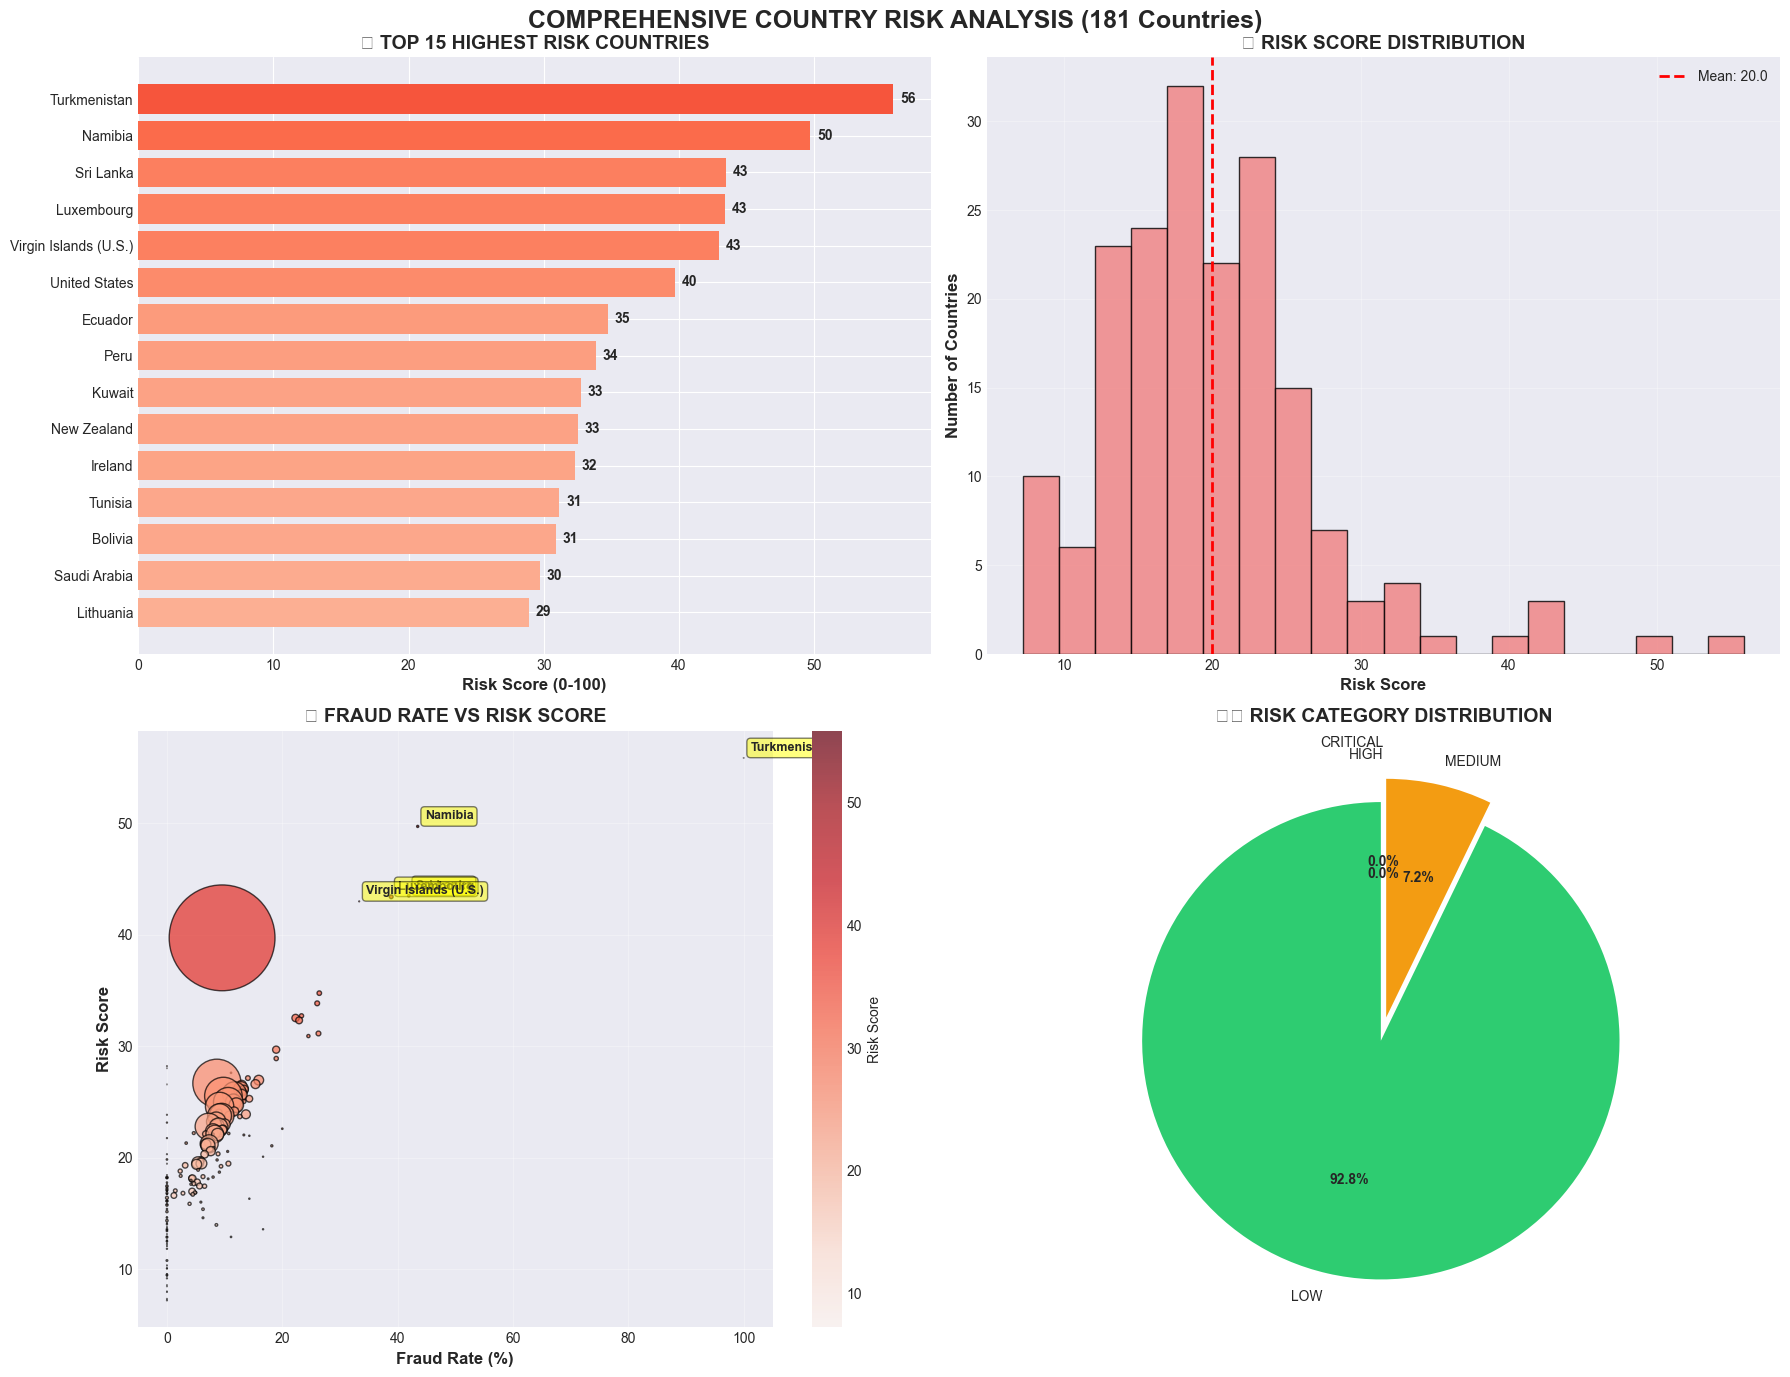

✅ Visualization saved: visualizations\country_risk_analysis_20251219_162113.png

📋 RISK SCORE SUMMARY
Country                   Risk Score   Fraud Rate   Transactions
------------------------------------------------------------------------------------------
Turkmenistan              55.9         100.0       % 1           
Namibia                   49.7         43.5        % 23          
Sri Lanka                 43.5         41.9        % 31          
Luxembourg                43.4         38.9        % 72          
Virgin Islands (U.S.)     43.0         33.3        % 3           
United States             39.7         9.6         % 58049       
Ecuador                   34.8         26.4        % 106         
Peru                      33.9         26.1        % 119         
Kuwait                    32.7         23.3        % 90          
New Zealand               32.5         22.3        % 278         
... and 171 more countries


In [30]:
# ============================================================================
# CREATE PRODUCTION VISUALIZATIONS
# ============================================================================

print("\n" + "="*90)
print("📈 CREATING RISK SCORE VISUALIZATIONS")
print("="*90)

# First, check what variables are available
print("🔍 Checking available variables...")
if 'country_risk' in locals():
    data_to_visualize = country_risk
    print(f"✅ Found 'country_risk' with {len(country_risk)} countries")
    print(f"   Risk scores range: {country_risk['total_risk_score'].min():.1f} to {country_risk['total_risk_score'].max():.1f}")
else:
    print("❌ No risk data available for visualization")
    data_to_visualize = None

if data_to_visualize is not None and len(data_to_visualize) > 0:
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    
    # Filter out any remaining "Error" or "Unknown" countries for display
    display_data = data_to_visualize[~data_to_visualize['country'].str.contains('Error|Unknown', case=False, na=False)]
    
    if len(display_data) == 0:
        print("⚠️ Warning: After filtering 'Error'/'Unknown', no countries remain for visualization.")
        display_data = data_to_visualize  # Use all data if filtering removes everything
    
    print(f"📊 Visualizing {len(display_data)} countries")
    
    # 1. Top 15 Highest Risk Countries
    ax1 = axes[0, 0]
    top_15 = display_data.head(15)
    if len(top_15) > 0:
        colors = plt.cm.Reds(top_15['total_risk_score'] / 100)
        bars = ax1.barh(top_15['country'], top_15['total_risk_score'], color=colors)
        ax1.set_xlabel('Risk Score (0-100)', fontsize=12, fontweight='bold')
        ax1.set_title('🚨 TOP 15 HIGHEST RISK COUNTRIES', fontsize=14, fontweight='bold')
        ax1.invert_yaxis()
        
        # Add score labels
        for bar in bars:
            width = bar.get_width()
            ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                    f'{width:.0f}', va='center', fontweight='bold', fontsize=10)
    else:
        ax1.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=12)
        ax1.set_title('🚨 TOP 15 HIGHEST RISK COUNTRIES', fontsize=14, fontweight='bold')
    
    # 2. Risk Score Distribution
    ax2 = axes[0, 1]
    if len(display_data) > 0:
        ax2.hist(display_data['total_risk_score'], bins=20, 
                 edgecolor='black', color='lightcoral', alpha=0.8)
        ax2.axvline(display_data['total_risk_score'].mean(), 
                    color='red', linestyle='--', linewidth=2,
                    label=f'Mean: {display_data["total_risk_score"].mean():.1f}')
        ax2.set_xlabel('Risk Score', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Number of Countries', fontsize=12, fontweight='bold')
        ax2.set_title('📊 RISK SCORE DISTRIBUTION', fontsize=14, fontweight='bold')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    else:
        ax2.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=12)
        ax2.set_title('📊 RISK SCORE DISTRIBUTION', fontsize=14, fontweight='bold')
    
    # 3. Fraud Rate vs Risk Score Scatter
    ax3 = axes[1, 0]
    if len(display_data) > 0:
        scatter = ax3.scatter(display_data['fraud_rate'], 
                             display_data['total_risk_score'],
                             s=display_data['total_transactions']/10,
                             c=display_data['total_risk_score'],
                             cmap='Reds', alpha=0.7, edgecolor='black')
        
        # Add country labels for top 5
        if len(display_data) >= 5:
            top_5 = display_data.head(5)
            for _, row in top_5.iterrows():
                ax3.annotate(row['country'], (row['fraud_rate'], row['total_risk_score']),
                            xytext=(5, 5), textcoords='offset points', fontsize=9,
                            fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", 
                            facecolor="yellow", alpha=0.5))
        
        ax3.set_xlabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Risk Score', fontsize=12, fontweight='bold')
        ax3.set_title('🎯 FRAUD RATE VS RISK SCORE', fontsize=14, fontweight='bold')
        ax3.grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=ax3, label='Risk Score')
    else:
        ax3.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=12)
        ax3.set_title('🎯 FRAUD RATE VS RISK SCORE', fontsize=14, fontweight='bold')
    
    # 4. Risk Category Breakdown
    ax4 = axes[1, 1]
    if len(display_data) > 0:
        risk_bins = pd.cut(display_data['total_risk_score'], 
                          bins=[0, 30, 60, 80, 100],
                          labels=['LOW', 'MEDIUM', 'HIGH', 'CRITICAL'])
        risk_cat_counts = risk_bins.value_counts()
        
        colors_cat = ['#2ECC71', '#F39C12', '#E67E22', '#E74C3C']
        wedges, texts, autotexts = ax4.pie(risk_cat_counts.values, 
                                           labels=risk_cat_counts.index,
                                           autopct='%1.1f%%',
                                           colors=colors_cat,
                                           startangle=90,
                                           explode=[0.05, 0.05, 0.05, 0.1])
        
        plt.setp(autotexts, size=10, weight="bold")
        ax4.set_title('⚠️ RISK CATEGORY DISTRIBUTION', fontsize=14, fontweight='bold')
    else:
        ax4.text(0.5, 0.5, 'No data available', ha='center', va='center', fontsize=12)
        ax4.set_title('⚠️ RISK CATEGORY DISTRIBUTION', fontsize=14, fontweight='bold')
    
    plt.suptitle(f'COMPREHENSIVE COUNTRY RISK ANALYSIS ({len(display_data)} Countries)', 
                 fontsize=18, fontweight='bold', y=0.98)
    plt.tight_layout()
    
    # Save visualization - FIXED PATH HANDLING
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Ensure VISUALIZATIONS_DIR is a Path object
    try:
        # Check if it's already a Path object
        if hasattr(VISUALIZATIONS_DIR, 'joinpath') or isinstance(VISUALIZATIONS_DIR, Path):
            viz_file = VISUALIZATIONS_DIR / f"country_risk_analysis_{timestamp}.png"
        else:
            # Convert string to Path
            from pathlib import Path
            vis_dir = Path(VISUALIZATIONS_DIR)
            viz_file = vis_dir / f"country_risk_analysis_{timestamp}.png"
    except Exception as e:
        # Fallback to string concatenation
        print(f"⚠️ Path error: {e}. Using string concatenation.")
        viz_file = f"{VISUALIZATIONS_DIR}/country_risk_analysis_{timestamp}.png"
    
    # Ensure directory exists
    os.makedirs(os.path.dirname(str(viz_file)), exist_ok=True)
    
    plt.savefig(str(viz_file), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Visualization saved: {viz_file}")
    
    # Also display a summary table
    print(f"\n📋 RISK SCORE SUMMARY")
    print("="*90)
    print(f"{'Country':<25} {'Risk Score':<12} {'Fraud Rate':<12} {'Transactions':<12}")
    print("-" * 90)
    for _, row in display_data.head(10).iterrows():
        print(f"{row['country']:<25} {row['total_risk_score']:<12.1f} {row['fraud_rate']:<12.1f}% {row['total_transactions']:<12}")
    
    if len(display_data) > 10:
        print(f"... and {len(display_data) - 10} more countries")
    
else:
    print("❌ No risk data available for visualization")

 4. 🔍 Geographic Patterns Analysis

Objective: Analyze how fraud patterns vary by geography.

Patterns to Examine:
- Time since signup patterns by country
- Browser/device usage by region  
- Purchase value distributions across risk levels
- Transaction timing patterns

Insights: Identify geographic-specific fraud patterns for targeted prevention.


🔍 GEOGRAPHIC PATTERNS ANALYSIS


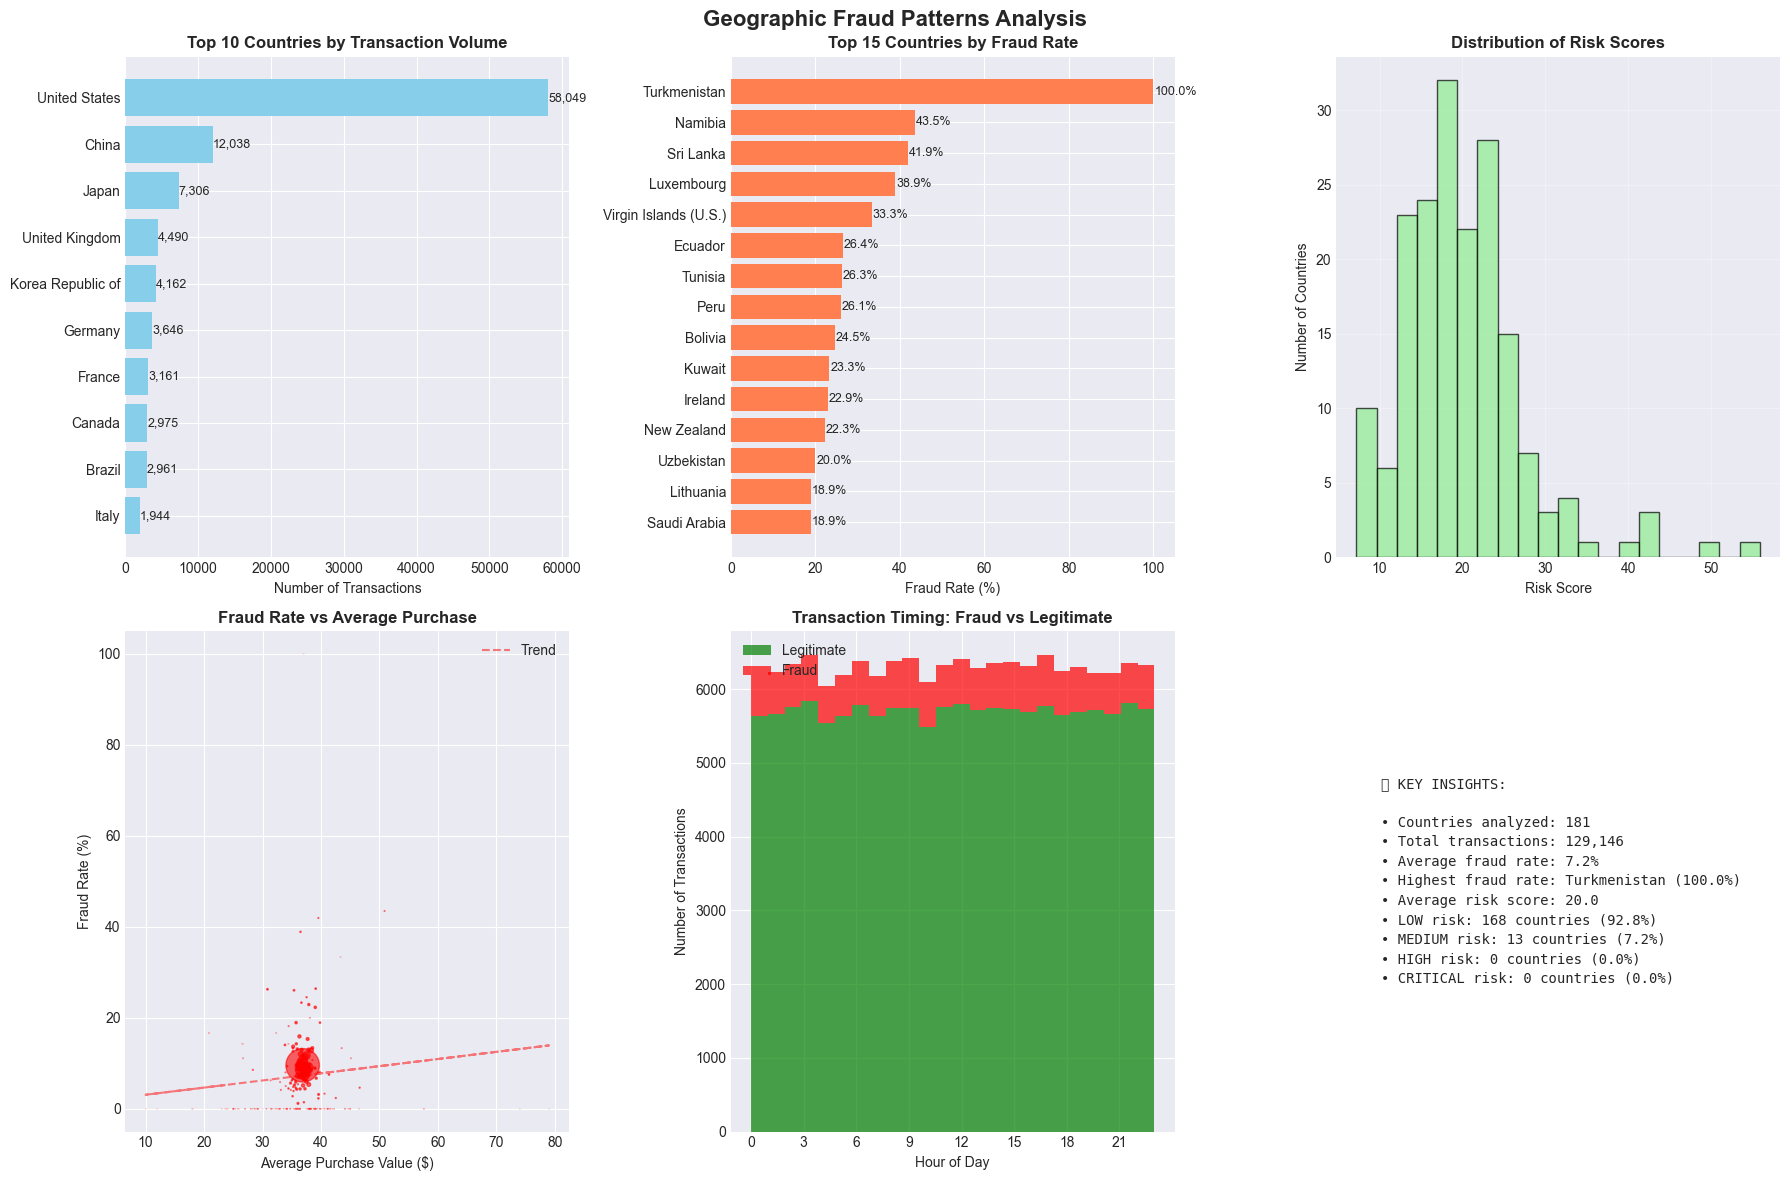


💾 Geographic patterns visualization saved: visualizations\geographic_patterns_20251219_162250.png
✅ Geographic patterns analysis completed!


In [31]:
# Geographic Patterns Analysis (FIXED VERSION)
print("\n" + "="*80)
print("🔍 GEOGRAPHIC PATTERNS ANALYSIS")
print("="*80)

if 'fraud_with_country' not in locals():
    print("❌ No mapped data available.")
else:
    # Create geographic analysis dashboard
    fig = plt.figure(figsize=(18, 12))
    
    # 1. Check if we have the required variables
    if 'country_risk' not in locals():
        print("⚠️ Warning: 'country_risk' not found. Using 'country_stats' if available.")
        if 'country_stats' in locals():
            analysis_data = country_stats
        else:
            analysis_data = None
    else:
        analysis_data = country_risk
    
    # 2. Top Countries by Transaction Volume
    plt.subplot(2, 3, 1)
    if analysis_data is not None and not analysis_data.empty:
        top_countries = analysis_data.nlargest(10, 'total_transactions')
        bars = plt.barh(top_countries['country'], top_countries['total_transactions'], color='skyblue')
        plt.xlabel('Number of Transactions')
        plt.title('Top 10 Countries by Transaction Volume', fontsize=12, fontweight='bold')
        plt.gca().invert_yaxis()
        
        # Add transaction count labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 5, bar.get_y() + bar.get_height()/2, 
                    f'{int(width):,}', va='center', fontsize=9)
    else:
        plt.text(0.5, 0.5, 'No data available\nfor analysis', ha='center', va='center', fontsize=12)
        plt.title('Transaction Volume Analysis', fontsize=12, fontweight='bold')
    
    # 3. Fraud Rate Distribution
    plt.subplot(2, 3, 2)
    if analysis_data is not None and not analysis_data.empty and 'fraud_rate' in analysis_data.columns:
        # Get top 15 countries by fraud rate
        high_fraud = analysis_data.nlargest(15, 'fraud_rate')
        bars = plt.barh(high_fraud['country'], high_fraud['fraud_rate'], color='coral')
        plt.xlabel('Fraud Rate (%)')
        plt.title('Top 15 Countries by Fraud Rate', fontsize=12, fontweight='bold')
        plt.gca().invert_yaxis()
        
        # Add fraud rate labels
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, 
                    f'{width:.1f}%', va='center', fontsize=9)
    else:
        plt.text(0.5, 0.5, 'No fraud rate data\navailable', ha='center', va='center', fontsize=12)
        plt.title('Fraud Rate Analysis', fontsize=12, fontweight='bold')
    
    # 4. Risk Score Distribution
    plt.subplot(2, 3, 3)
    if analysis_data is not None and not analysis_data.empty and 'total_risk_score' in analysis_data.columns:
        plt.hist(analysis_data['total_risk_score'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
        plt.xlabel('Risk Score')
        plt.ylabel('Number of Countries')
        plt.title('Distribution of Risk Scores', fontsize=12, fontweight='bold')
        plt.grid(True, alpha=0.3)
    else:
        plt.text(0.5, 0.5, 'No risk score data\navailable', ha='center', va='center', fontsize=12)
        plt.title('Risk Score Distribution', fontsize=12, fontweight='bold')
    
    # 5. Fraud Rate vs Purchase Value
    plt.subplot(2, 3, 4)
    if analysis_data is not None and not analysis_data.empty and 'fraud_rate' in analysis_data.columns and 'avg_purchase' in analysis_data.columns:
        plt.scatter(analysis_data['avg_purchase'], analysis_data['fraud_rate'], 
                   s=analysis_data['total_transactions']/100, alpha=0.6, c='red')
        plt.xlabel('Average Purchase Value ($)')
        plt.ylabel('Fraud Rate (%)')
        plt.title('Fraud Rate vs Average Purchase', fontsize=12, fontweight='bold')
        
        # Add trend line if enough data points
        if len(analysis_data) > 2:
            x = analysis_data['avg_purchase']
            y = analysis_data['fraud_rate']
            z = np.polyfit(x, y, 1)
            p = np.poly1d(z)
            plt.plot(x, p(x), "r--", alpha=0.5, label='Trend')
            plt.legend()
    else:
        plt.text(0.5, 0.5, 'Insufficient data\nfor scatter plot', ha='center', va='center', fontsize=12)
        plt.title('Purchase vs Fraud Analysis', fontsize=12, fontweight='bold')
    
    # 6. Time Analysis (if available)
    plt.subplot(2, 3, 5)
    if 'fraud_with_country' in locals() and 'purchase_time' in fraud_with_country.columns:
        try:
            fraud_with_country['purchase_hour'] = pd.to_datetime(fraud_with_country['purchase_time']).dt.hour
            fraud_hours = fraud_with_country[fraud_with_country['class'] == 1]['purchase_hour']
            legit_hours = fraud_with_country[fraud_with_country['class'] == 0]['purchase_hour']
            
            plt.hist([legit_hours, fraud_hours], bins=24, label=['Legitimate', 'Fraud'], 
                    color=['green', 'red'], alpha=0.7, stacked=True)
            plt.xlabel('Hour of Day')
            plt.ylabel('Number of Transactions')
            plt.title('Transaction Timing: Fraud vs Legitimate', fontsize=12, fontweight='bold')
            plt.legend()
            plt.xticks(range(0, 24, 3))
        except Exception as e:
            plt.text(0.5, 0.5, f'Time analysis error', ha='center', va='center', fontsize=10)
            plt.title('Time Analysis Error', fontsize=12, fontweight='bold')
    else:
        plt.text(0.5, 0.5, 'Time data not available\nfor analysis', ha='center', va='center', fontsize=10)
        plt.title('Time Analysis Not Available', fontsize=12, fontweight='bold')
    
    # 7. Key Insights Summary
    plt.subplot(2, 3, 6)
    plt.axis('off')
    
    insights = []
    insights.append("🔍 KEY INSIGHTS:\n")
    
    try:
        if analysis_data is not None and not analysis_data.empty:
            insights.append(f"• Countries analyzed: {len(analysis_data)}")
            insights.append(f"• Total transactions: {analysis_data['total_transactions'].sum():,}")
            
            if 'fraud_rate' in analysis_data.columns:
                avg_fraud_rate = analysis_data['fraud_rate'].mean()
                insights.append(f"• Average fraud rate: {avg_fraud_rate:.1f}%")
                
                # Find highest fraud rate
                max_fraud = analysis_data.loc[analysis_data['fraud_rate'].idxmax()]
                insights.append(f"• Highest fraud rate: {max_fraud['country']} ({max_fraud['fraud_rate']:.1f}%)")
            
            if 'total_risk_score' in analysis_data.columns:
                avg_risk = analysis_data['total_risk_score'].mean()
                insights.append(f"• Average risk score: {avg_risk:.1f}")
                
                # Risk categories
                risk_categories = pd.cut(analysis_data['total_risk_score'], 
                                       bins=[0, 30, 60, 80, 100],
                                       labels=['LOW', 'MEDIUM', 'HIGH', 'CRITICAL'])
                cat_counts = risk_categories.value_counts()
                
                for cat, count in cat_counts.items():
                    percentage = (count / len(analysis_data)) * 100
                    insights.append(f"• {cat} risk: {count} countries ({percentage:.1f}%)")
    except Exception as e:
        insights.append(f"• Error generating insights: {str(e)[:50]}")
    
    plt.text(0.1, 0.5, '\n'.join(insights), fontsize=10, 
             verticalalignment='center', fontfamily='monospace', linespacing=1.5)
    
    plt.suptitle('Geographic Fraud Patterns Analysis', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    
    # Save visualization - FIXED PATH HANDLING
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    try:
        # Ensure VISUALIZATIONS_DIR is a Path object
        if hasattr(VISUALIZATIONS_DIR, 'joinpath') or isinstance(VISUALIZATIONS_DIR, Path):
            patterns_file = VISUALIZATIONS_DIR / f"geographic_patterns_{timestamp}.png"
        else:
            from pathlib import Path
            vis_dir = Path(VISUALIZATIONS_DIR)
            patterns_file = vis_dir / f"geographic_patterns_{timestamp}.png"
    except Exception as e:
        print(f"⚠️ Path error: {e}. Using string concatenation.")
        patterns_file = f"{VISUALIZATIONS_DIR}/geographic_patterns_{timestamp}.png"
    
    # Ensure directory exists
    os.makedirs(os.path.dirname(str(patterns_file)), exist_ok=True)
    
    plt.savefig(str(patterns_file), dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"\n💾 Geographic patterns visualization saved: {patterns_file}")
    print("✅ Geographic patterns analysis completed!")

In [33]:
# ============================================================================
# CREATE PRODUCTION REPORT - FIXED VERSION
# ============================================================================

print("\n" + "="*90)
print("📄 CREATING PRODUCTION REPORT")
print("="*90)

# Determine which variable to use
risk_data = None
if 'country_risk' in locals():
    risk_data = country_risk
    print(f"✅ Using 'country_risk' with {len(risk_data)} countries")
elif 'country_stats' in locals():
    risk_data = country_stats
    print(f"✅ Using 'country_stats' with {len(risk_data)} countries")
else:
    print("❌ No risk data available for reporting")

if risk_data is not None and len(risk_data) > 0:
    # Filter out any "Error" or "Unknown" countries for reporting
    report_data = risk_data[~risk_data['country'].str.contains('Error|Unknown', case=False, na=False)]
    
    if len(report_data) == 0:
        print("⚠️ Warning: After filtering, no valid countries remain. Using all data.")
        report_data = risk_data
    
    print(f"📊 Creating report with data for {len(report_data)} countries")
    
    # Create comprehensive report
    try:
        # Prepare basic statistics
        total_transactions = report_data['total_transactions'].sum()
        avg_fraud_rate = report_data['fraud_rate'].mean()
        
        report_content = {
            "project": "Geolocation Fraud Detection",
            "analysis_date": datetime.now().isoformat(),
            "data_sources": {
                "fraud_data": f"{len(fraud_df):,} transactions" if 'fraud_df' in locals() and not fraud_df.empty else "Not loaded",
                "ip_mapping": f"{len(ip_df):,} IP ranges" if 'ip_df' in locals() and not ip_df.empty else "Not loaded",
                "mapped_data": f"{len(fraud_with_country):,} transactions" if 'fraud_with_country' in locals() else "Not mapped"
            },
            "summary_statistics": {
                "total_countries_analyzed": len(report_data),
                "total_transactions_analyzed": int(total_transactions),
                "overall_fraud_rate": f"{avg_fraud_rate:.2f}%",
                "unique_countries": len(report_data['country'].unique())
            },
            "top_5_highest_risk": [],
            "top_5_lowest_risk": []
        }
        
        # Add top 5 highest risk countries
        top_5 = report_data.head(5)
        for i, (_, row) in enumerate(top_5.iterrows(), 1):
            report_content["top_5_highest_risk"].append({
                "rank": i,
                "country": row['country'],
                "risk_score": float(row['total_risk_score']) if 'total_risk_score' in row else 0,
                "fraud_rate": float(row['fraud_rate']),
                "transactions": int(row['total_transactions'])
            })
        
        # Add top 5 lowest risk countries
        bottom_5 = report_data.tail(5)
        for i, (_, row) in enumerate(bottom_5.iterrows(), 1):
            report_content["top_5_lowest_risk"].append({
                "rank": i,
                "country": row['country'],
                "risk_score": float(row['total_risk_score']) if 'total_risk_score' in row else 0,
                "fraud_rate": float(row['fraud_rate']),
                "transactions": int(row['total_transactions'])
            })
        
        # Add risk distribution if risk scores are available
        if 'total_risk_score' in report_data.columns:
            risk_bins = pd.cut(report_data['total_risk_score'], 
                              bins=[0, 30, 60, 80, 100],
                              labels=['LOW', 'MEDIUM', 'HIGH', 'CRITICAL'])
            risk_cat_counts = risk_bins.value_counts()
            
            report_content["risk_distribution"] = {}
            for category, count in risk_cat_counts.items():
                report_content["risk_distribution"][str(category)] = {
                    "count": int(count),
                    "percentage": f"{(count/len(report_data)*100):.1f}%"
                }
        
        # Save JSON report - FIXED PATH HANDLING
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        
        try:
            # Ensure REPORTS_DIR is a Path object
            if hasattr(REPORTS_DIR, 'joinpath') or isinstance(REPORTS_DIR, Path):
                json_file = REPORTS_DIR / f"fraud_risk_report_{timestamp}.json"
            else:
                from pathlib import Path
                rep_dir = Path(REPORTS_DIR)
                json_file = rep_dir / f"fraud_risk_report_{timestamp}.json"
        except Exception as e:
            print(f"⚠️ Path error: {e}. Using string concatenation.")
            json_file = f"{REPORTS_DIR}/fraud_risk_report_{timestamp}.json"
        
        # Ensure directory exists
        os.makedirs(os.path.dirname(str(json_file)), exist_ok=True)
        
        with open(str(json_file), 'w') as f:
            json.dump(report_content, f, indent=2, default=str)
        
        print(f"✅ JSON report saved: {json_file}")
        
        # Display summary in console
        print(f"\n📋 REPORT SUMMARY")
        print("="*90)
        print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Countries Analyzed: {len(report_data)}")
        print(f"Transactions Analyzed: {total_transactions:,}")
        print(f"Overall Fraud Rate: {avg_fraud_rate:.2f}%")
        
        print(f"\n🏆 TOP 5 HIGHEST RISK COUNTRIES:")
        for item in report_content["top_5_highest_risk"]:
            print(f"  {item['rank']}. {item['country']:<20} Risk: {item['risk_score']:<6.1f} Fraud: {item['fraud_rate']:<6.1f}% Trans: {item['transactions']:,}")
        
        print(f"\n✅ TOP 5 LOWEST RISK COUNTRIES:")
        for item in report_content["top_5_lowest_risk"]:
            print(f"  {item['rank']}. {item['country']:<20} Risk: {item['risk_score']:<6.1f} Fraud: {item['fraud_rate']:<6.1f}% Trans: {item['transactions']:,}")
        
        # Create a simple text report
        text_report = f"""
{'='*90}
FRAUD RISK ANALYSIS REPORT
{'='*90}
Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Data Sources: {report_content['data_sources']['mapped_data']}
Countries Analyzed: {len(report_data)}
Transactions Analyzed: {total_transactions:,}
Overall Fraud Rate: {avg_fraud_rate:.2f}%

TOP 5 HIGHEST RISK COUNTRIES:
{'-'*90}
"""
        
        for item in report_content["top_5_highest_risk"]:
            text_report += f"{item['rank']:2}. {item['country'][:20]:<20} Risk: {item['risk_score']:<6.1f} Fraud: {item['fraud_rate']:<6.1f}% Trans: {item['transactions']:,}\n"
        
        text_report += f"""
TOP 5 LOWEST RISK COUNTRIES:
{'-'*90}
"""
        
        for item in report_content["top_5_lowest_risk"]:
            text_report += f"{item['rank']:2}. {item['country'][:20]:<20} Risk: {item['risk_score']:<6.1f} Fraud: {item['fraud_rate']:<6.1f}% Trans: {item['transactions']:,}\n"
        
        if "risk_distribution" in report_content:
            text_report += f"""
RISK DISTRIBUTION:
{'-'*90}
"""
            for category, stats in report_content["risk_distribution"].items():
                text_report += f"{category:<10}: {stats['count']} countries ({stats['percentage']})\n"
        
        try:
            # Ensure REPORTS_DIR is a Path object for text file too
            if hasattr(REPORTS_DIR, 'joinpath') or isinstance(REPORTS_DIR, Path):
                text_file = REPORTS_DIR / f"fraud_risk_summary_{timestamp}.txt"
            else:
                from pathlib import Path
                rep_dir = Path(REPORTS_DIR)
                text_file = rep_dir / f"fraud_risk_summary_{timestamp}.txt"
        except Exception as e:
            print(f"⚠️ Path error for text file: {e}. Using string concatenation.")
            text_file = f"{REPORTS_DIR}/fraud_risk_summary_{timestamp}.txt"
        
        # Ensure directory exists
        os.makedirs(os.path.dirname(str(text_file)), exist_ok=True)
        
        with open(str(text_file), 'w') as f:
            f.write(text_report)
        
        print(f"\n📄 Text report saved: {text_file}")
        print(f"\n📁 All outputs saved to: {OUTPUT_DIR}")
        
    except Exception as e:
        print(f"❌ Error creating report: {e}")
        import traceback
        traceback.print_exc()
        
else:
    print("❌ No risk data available for reporting")


📄 CREATING PRODUCTION REPORT
✅ Using 'country_risk' with 181 countries
📊 Creating report with data for 181 countries
✅ JSON report saved: reports\fraud_risk_report_20251219_162833.json

📋 REPORT SUMMARY
Analysis Date: 2025-12-19 16:28:33
Countries Analyzed: 181
Transactions Analyzed: 129,146
Overall Fraud Rate: 7.17%

🏆 TOP 5 HIGHEST RISK COUNTRIES:
  1. Turkmenistan         Risk: 55.9   Fraud: 100.0 % Trans: 1
  2. Namibia              Risk: 49.7   Fraud: 43.5  % Trans: 23
  3. Sri Lanka            Risk: 43.5   Fraud: 41.9  % Trans: 31
  4. Luxembourg           Risk: 43.4   Fraud: 38.9  % Trans: 72
  5. Virgin Islands (U.S.) Risk: 43.0   Fraud: 33.3  % Trans: 3

✅ TOP 5 LOWEST RISK COUNTRIES:
  1. Burkina Faso         Risk: 8.5    Fraud: 0.0   % Trans: 2
  2. Tajikistan           Risk: 8.0    Fraud: 0.0   % Trans: 1
  3. Maldives             Risk: 8.0    Fraud: 0.0   % Trans: 2
  4. Benin                Risk: 7.4    Fraud: 0.0   % Trans: 2
  5. Monaco               Risk: 7.2    Fraud